<a href="https://colab.research.google.com/github/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more/blob/visualization/phishing_check_visu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project focuses on detecting phishing messages by transforming text data into numerical features, which are then used for classification.

The text is converted into a numerical representation using different feature extraction techniques, which allow machine learning models to interpret the data.

Once the text is represented numerically, various algorithms are used to train the model, enabling it to classify messages as phishing or legitimate.

This approach leverages natural language processing (NLP) methods to understand and process the content of messages for phishing detection.

In [3]:
!pip install datasets
!pip install nltk
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install pandas
!pip install transformers
!pip install csv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Looking in indexes: https://download.pytorch.org/whl/cpu
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfi


**Bag-of-Words (BoW)**

This method converts text into a set of words, treating each word as an independent feature based on its frequency. The model uses word frequency to distinguish phishing messages from legitimate ones.

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from datasets import load_dataset

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())

# Split the data into training and testing sets with a different random state
new_random_state = 21  # Change this value to create a new split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=new_random_state)

# Print heads of split datasets to ensure proper division
print("\nTraining Set Head:")
print(pd.DataFrame({'text': X_train[:5], 'label': y_train[:5]}))

print("\nTesting Set Head:")
print(pd.DataFrame({'text': X_test[:5], 'label': y_test[:5]}))

# Convert text data into Bag-of-Words features
vectorizer = CountVectorizer()  # Or use TfidfVectorizer() for TF-IDF features
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Verify BoW transformation
print("\nVocabulary Sample:", list(vectorizer.vocabulary_.items())[:10])  # Print 10 sample words from the vocabulary
print("\nBoW Training Data Shape:", X_train_bow.shape)
print("\nBoW Testing Data Shape:", X_test_bow.shape)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_bow)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets

print("\nEvaluation Metrics with New Random State:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the vectorizer and the model for future use
import joblib
joblib.dump(vectorizer, "bow_vectorizer_new.pkl")
joblib.dump(classifier, "bow_classifier_new.pkl")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

phishing-dataset.py:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

texts.json:   0%|          | 0.00/52.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

['bow_classifier_new.pkl']

In [5]:
!pip install wordcloud


In [6]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    # Remove digits and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the text data (apply the function to all texts)
cleaned_texts = [clean_and_tokenize(text) for text in texts]

# Use CountVectorizer to extract the top words
vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.9)  # Use thresholding to filter rare/common words
X_bow = vectorizer.fit_transform(cleaned_texts)

# Get the word counts
word_counts = dict(zip(vectorizer.get_feature_names_out(), X_bow.sum(axis=0).tolist()[0]))

# Filter out any extremely short or non-textual words
filtered_word_counts = {word: count for word, count in word_counts.items() if len(word) > 2 and word.isalpha()}

# Convert to DataFrame for easier visualization
df_word_counts = pd.DataFrame(list(filtered_word_counts.items()), columns=["word", "count"])

# Sort the words by frequency in descending order
df_word_counts = df_word_counts.sort_values(by="count", ascending=False)

# Display the top 20 words
print(df_word_counts.head(20))


              word  count
9910         enron  17841
29739   university  17234
9630         email  16913
16446     language  16892
14797  information  14381
19524          new  13098
27394      subject  11995
9340           ect  10908
5711           com  10755
28638         time   9673
17005  linguistics   8900
13929         http   8851
16917         like   8818
17053         list   8583
15891         just   8245
377        address   8212
17571         mail   8202
21194       people   8092
5840       company   8064
11730         free   8056


<ipython-input-7-2e4455c69fe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_word_counts.head(20), palette='viridis')


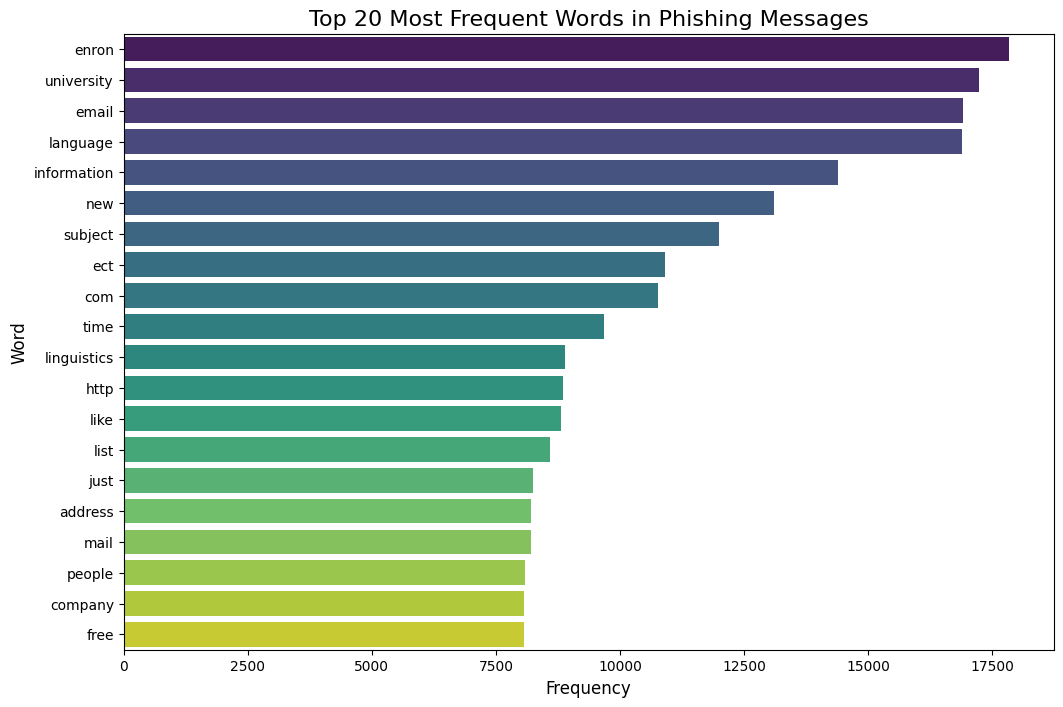

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=df_word_counts.head(20), palette='viridis')

# Add labels and title
plt.title("Top 20 Most Frequent Words in Phishing Messages", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)

# Show the plot
plt.show()


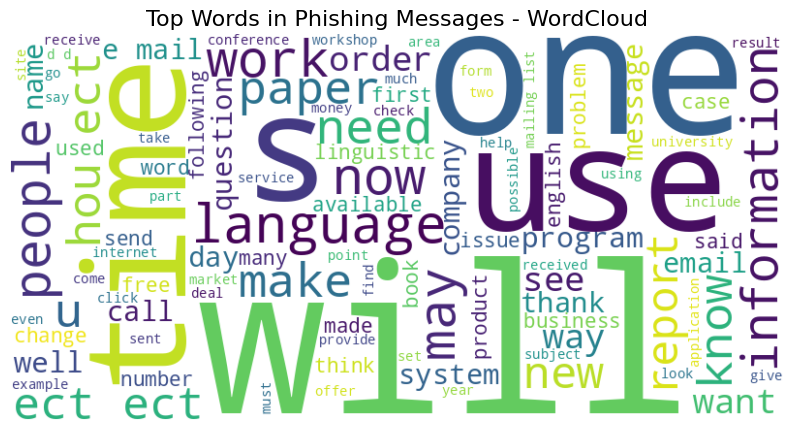

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned text into one large string
all_text = ' '.join(cleaned_texts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Top Words in Phishing Messages - WordCloud", fontsize=16)
plt.show()



**TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF weighs words based on their frequency in a document and their rarity across all documents. This helps the model prioritize important, unique words, improving phishing detection accuracy.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from datasets import load_dataset

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=150000)  # You can adjust the number of features here
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Verify TF-IDF transformation
print("\nVocabulary Sample:", list(vectorizer.vocabulary_.items())[:10])  # Print 10 sample words from the vocabulary
print("\nTF-IDF Training Data Shape:", X_train_tfidf.shape)
print("\nTF-IDF Testing Data Shape:", X_test_tfidf.shape)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets

print("\nEvaluation Metrics with TF-IDF Baseline:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the vectorizer and the model for future use
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(classifier, "tfidf_classifier.pkl")


Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

['tfidf_classifier.pkl']

**Graph**: Distribution of Phishing vs Non-Phishing

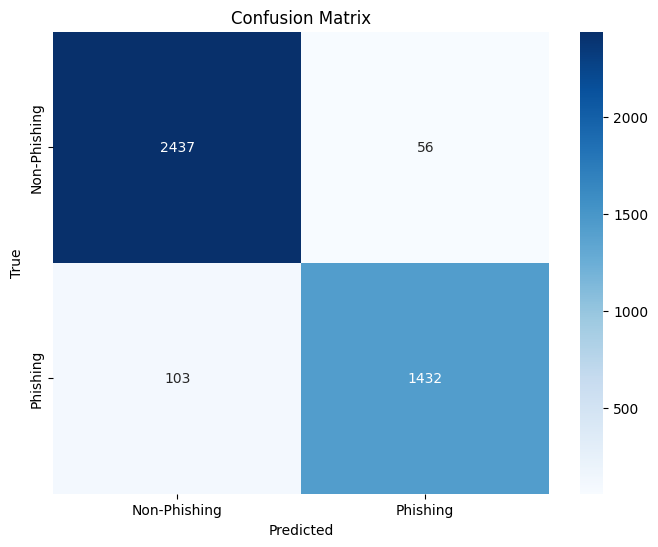

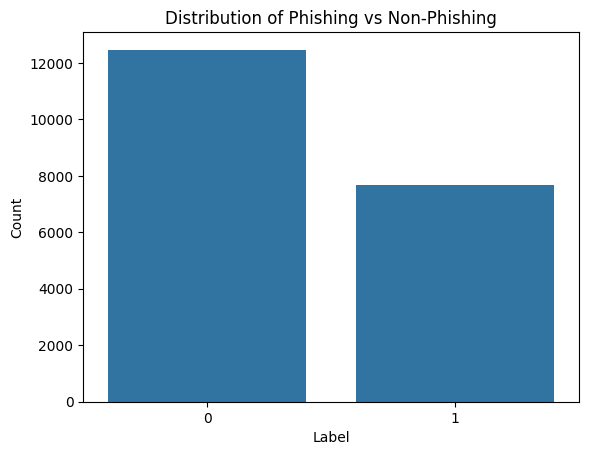

['tfidf_classifier.pkl']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Create Seaborn heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Phishing", "Phishing"], yticklabels=["Non-Phishing", "Phishing"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create a distribution plot of the labels (Phishing vs Non-Phishing)
sns.countplot(x='label', data=df)
plt.title("Distribution of Phishing vs Non-Phishing")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Save the vectorizer and the model for future use
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(classifier, "tfidf_classifier.pkl")

**ROC Curve (Receiver Operating Characteristic Curve):**

 shows how well a model distinguishes between positive and negative classes at different thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

AUC (Area Under the Curve) measures the overall performance of the model. It ranges from 0 to 1:

AUC = 0.5: The model is no better than random guessing.

AUC = 1: The model perfectly classifies all instances.

A higher AUC indicates a better performing model.

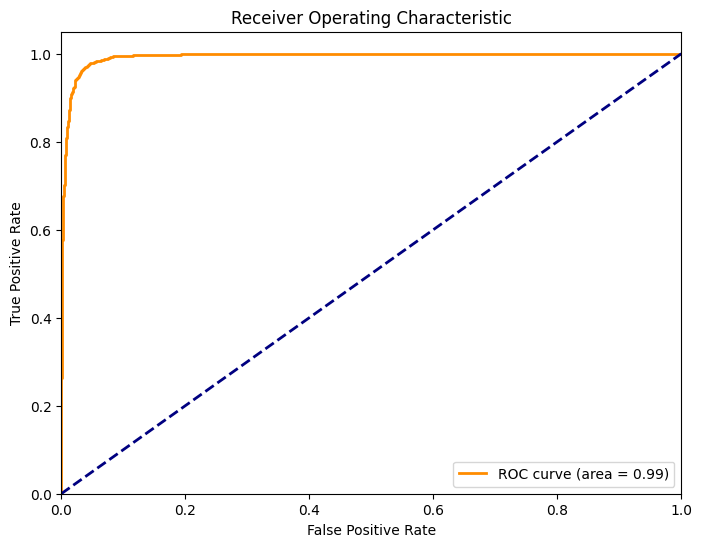

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**BERT Embeddings**

 BERT transforms text into embeddings by considering the context of each word in a sentence. It processes the text through a pre-trained model, capturing deep semantic meaning, which helps improve the accuracy of phishing detection.

In [12]:
from nltk.tokenize import RegexpTokenizer
import re
import pandas as pd
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# def custom_tokenizer(text):
#     # Normalize case
#     text = text.lower()

#     # Replace URLs and emails
#     text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
#     text = re.sub(r'\S+@\S+\.\S+', '<EMAIL>', text)

#     # Use RegexpTokenizer to handle special patterns
#     tokenizer = RegexpTokenizer(r'\w+|<URL>|<EMAIL>|[^\w\s]')
#     tokens = tokenizer.tokenize(text)

#     return tokens

def text_to_embedding(text):
    # Tokenize and create input IDs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Move inputs to GPU
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        # Get embeddings from BERT
        outputs = model(**inputs)
        # Mean pooling to create a single sentence embedding
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding.squeeze().cpu().numpy()  # Move result back to CPU

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Prepare a list for embedded data
embedded_data = []
for i in range(len(dataset['train'])):
    text = dataset['train'][i]['text']
    numeric = text_to_embedding(text)
    # Append the data as a dictionary
    embedded_data.append({"embeddeded_data": numeric, "label": dataset['train'][i]['label']})

# Convert to DataFrame
df = pd.DataFrame(embedded_data)
print(df.head())

# Save the DataFrame to a CSV file
csv_file_path = "tokenized_data.csv"
df.to_csv(csv_file_path, index=False)

# Verify the results
print("Data saved to", csv_file_path)



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

                                     embeddeded_data  label
0  [-0.23840225, 0.29437107, 0.15873352, -0.30811...      0
1  [0.020063879, 0.19346473, 0.032713287, -0.2022...      0
2  [-0.12743124, -0.14868295, 0.41058612, 0.09094...      0
3  [0.2967644, 0.29070988, 0.84305334, -0.1575460...      1
4  [-0.17464297, -0.10808944, 0.610938, -0.187545...      1
Data saved to tokenized_data.csv


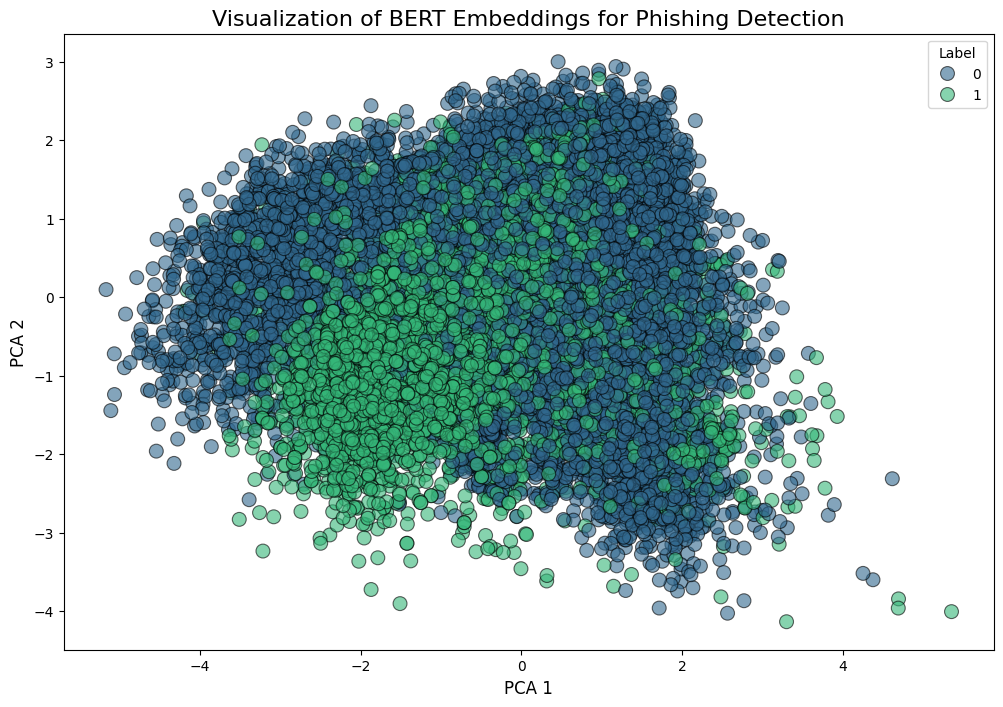

In [13]:
import torch
import pandas as pd
import re
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def text_to_embedding(text):
    # Tokenize and create input IDs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Move inputs to GPU
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        # Get embeddings from BERT
        outputs = model(**inputs)
        # Mean pooling to create a single sentence embedding
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding.squeeze().cpu().numpy()  # Move result back to CPU

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Extract the texts and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Prepare a list for embedded data
embedded_data = []
for text in texts:
    embedded_data.append(text_to_embedding(text))

# Convert to a numpy array for easier manipulation
embeddings = np.array(embedded_data)

# Step 1: Dimensionality Reduction (using PCA or t-SNE)

# Option 1: Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Option 2: Use t-SNE (you can experiment with this)
# tsne = TSNE(n_components=2, random_state=42)
# reduced_embeddings = tsne.fit_transform(embeddings)

# Step 2: Visualize using Seaborn/Matplotlib
# Convert reduced embeddings into a DataFrame
df = pd.DataFrame(reduced_embeddings, columns=['x', 'y'])
df['label'] = labels

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x', y='y', hue='label', palette='viridis', data=df, s=100, alpha=0.6, edgecolor='k')

# Add plot titles and labels
plt.title('Visualization of BERT Embeddings for Phishing Detection', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)

# Show the plot
plt.legend(title='Label', loc='best')
plt.show()


In [14]:
import torch
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Text to embedding function
def text_to_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding.cpu().numpy()

# Load the dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Prepare embedded data
embedded_data = []
for i in range(len(dataset['train'])):
    text = dataset['train'][i]['text']
    numeric = text_to_embedding(text)  # Get embedding as NumPy array
    embedded_data.append(numeric.squeeze()) # Append to the list, squeezing redundant dimension if it exists

# Convert to PyTorch tensor directly
X = torch.tensor(np.array(embedded_data), dtype=torch.float32)
y = torch.tensor(dataset['train']['label'], dtype=torch.long)  # Labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with your model training
# ...

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
logreg = LogisticRegression(max_iter=1000)
print(X_train[1])
print(X_test[1])
# Train the model
# logreg.fit(X_train, y_train)

# # Make predictions
# y_pred = logreg.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))


tensor([-3.9960e-02, -5.1718e-01,  9.2422e-02, -4.0368e-01,  4.9880e-01,
        -4.0248e-01, -1.8766e-02,  8.5355e-01,  5.0835e-02, -3.4468e-01,
         1.3964e-01, -5.3211e-01, -2.8538e-02,  3.8109e-01, -1.5205e-01,
        -6.1454e-02,  4.6030e-01,  1.7244e-01,  1.3398e-01,  3.7134e-01,
         4.7642e-01, -3.4933e-02,  2.6481e-02,  3.4761e-01,  1.1297e-01,
         3.6298e-03,  1.5910e-02,  1.0546e-01,  1.8051e-01, -1.1308e-02,
         1.4159e-02,  2.1774e-02, -5.0295e-01,  8.7379e-02, -1.2226e-01,
        -1.1940e-01, -2.5721e-01,  4.6467e-01, -3.1364e-01,  1.8566e-01,
        -4.0216e-01, -3.8650e-01,  2.7555e-01,  1.5056e-01, -3.9401e-01,
        -5.0744e-01,  1.1343e-01, -1.9556e-01,  1.1245e-01, -9.2394e-02,
         2.4548e-01,  3.8560e-01, -2.7930e-01,  2.9354e-01, -2.1495e-01,
         4.0819e-01, -6.8967e-02, -3.7884e-01, -3.2287e-01,  2.2309e-01,
         1.8686e-01, -1.4651e-01,  3.6724e-01, -6.2527e-01,  3.8705e-01,
         4.1213e-01, -4.9238e-02,  6.4752e-04, -4.7

# Linear Regression- PT

In [ ]:
import torch
import torch.nn as nn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=150000)
X_tfidf = vectorizer.fit_transform(df['text']).toarray()

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Step 3: Define Logistic Regression Model in PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer with one output for binary classification
        self.sigmoid = nn.Sigmoid()            # Apply sigmoid for probabilities

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Initialize Model
input_size = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_size)

# Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 10
batch_size = 64
for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))

    for i in range(0, X_train_tensor.size(0), batch_size):
        optimizer.zero_grad()

        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward Pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Step 5: Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).int()

# Print Metrics
accuracy = accuracy_score(y_test_tensor, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_tensor, y_pred, target_names=["Legitimate", "Phishing"]))


# Linear Regression-sklearn

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)
# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())

# Split the data into training and testing sets
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=150000, stop_words='english')

# Step 2: Fit and Transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model
logistic_model.fit(X_train_tfidf, y_train)

# Step 4: Predict using the trained model
y_pred = logistic_model.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print("\nAccuracy of Logistic Regression Model:", accuracy)
print("\nClassification Report:")
print(report)

# Compare results to the baseline
# Assuming baseline_accuracy and baseline_report are available from previous step
# Replace 'baseline_accuracy' and 'baseline_report' with actual values
# print("\nComparison with Baseline:\n")
# print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
# print("Baseline Classification Report:\n")
# print(baseline_report)


Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

#FCNN Model

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from datasets import load_dataset
import pandas as pd
# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)
# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())
# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=150000)
X_tfidf = vectorizer.fit_transform(df['text']).toarray()

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Step 3: Define Fully Connected Neural Network
class SimpleFCNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleFCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Fully connected layer 1
        self.fc2 = nn.Linear(hidden_size, 1)          # Fully connected layer 2 (output)
        self.sigmoid = nn.Sigmoid()                   # Apply sigmoid for binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation after fc1
        x = self.sigmoid(self.fc2(x))  # Apply sigmoid after fc2
        return x

# Initialize Model
input_size = X_train_tensor.shape[1]
hidden_size = 128  # Number of neurons in the hidden layer
model = SimpleFCNN(input_size, hidden_size)

# Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 10
batch_size = 64
for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))

    for i in range(0, X_train_tensor.size(0), batch_size):
        optimizer.zero_grad()

        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward Pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Step 5: Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).int()

# Print Metrics
accuracy = accuracy_score(y_test_tensor, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_tensor, y_pred, target_names=["Legitimate", "Phishing"]))


Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

In [18]:
import torch.nn as nn
import torch.optim as optim

# Define a simple classifier
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
input_dim = X_train.shape[1]  # Number of features
num_classes = len(torch.unique(y))  # Number of unique labels
classifier = SimpleClassifier(input_dim, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Training loop
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    classifier.train()
    permutation = torch.randperm(X_train.size(0))
    total_loss = 0

    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices].to(device), y_train[indices].to(device)

        optimizer.zero_grad()
        outputs = classifier(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")

# Evaluate the model
classifier.eval()
with torch.no_grad():
    y_pred = []
    for i in range(0, X_test.size(0), batch_size):
        batch_x = X_test[i:i + batch_size].to(device)
        outputs = classifier(batch_x)
        y_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())

# Calculate accuracy
y_pred = torch.tensor(y_pred)
accuracy = (y_pred == y_test).sum().item() / y_test.size(0) * 100
print(f"Accuracy: {accuracy:.2f}%")


# Convert PyTorch tensors to numpy arrays for the classification report
y_test_numpy = y_test.cpu().numpy()
y_pred_numpy = y_pred.cpu().numpy()

# Print classification report
print("\nClassification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test_numpy, y_pred_numpy, target_names=["Legitimate", "Phishing"]))


Epoch 1/10, Loss: 135.7253
Epoch 2/10, Loss: 86.0259
Epoch 3/10, Loss: 76.9326
Epoch 4/10, Loss: 71.6313
Epoch 5/10, Loss: 67.7272
Epoch 6/10, Loss: 65.0329
Epoch 7/10, Loss: 63.2318
Epoch 8/10, Loss: 60.9002
Epoch 9/10, Loss: 59.4647
Epoch 10/10, Loss: 57.7541
Accuracy: 96.33%

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.97      0.97      0.97      2493
    Phishing       0.96      0.95      0.95      1535

    accuracy                           0.96      4028
   macro avg       0.96      0.96      0.96      4028
weighted avg       0.96      0.96      0.96      4028



In [2]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296227 sha256=6a27ff857fac220851d0c931eeceb6b28c3f54f411fdc32818339c6c3c242ffb
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [3]:
import pandas as pd
from datasets import load_dataset

# Load phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Map labels to FastText format
formatted_data = []
for text, label in zip(texts, labels):
    label_str = '__label__phishing' if label == 1 else '__label__legitimate'
    formatted_data.append(f"{label_str} {text}")

# Save formatted data to a file
with open("phishing_train.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(formatted_data))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
import fasttext

# Train FastText model
model = fasttext.train_supervised(input="phishing_train.txt", epoch=25, lr=1.0, wordNgrams=2)

# Save the model
model.save_model("fasttext_phishing_model.bin")

In [5]:
from sklearn.model_selection import train_test_split

# Extract the 'train' split from the dataset
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Create train-test split
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Format the train and test data for FastText
formatted_train_data = []
for text, label in zip(texts_train, labels_train):
    label_str = '__label__phishing' if label == 1 else '__label__legitimate'
    formatted_train_data.append(f"{label_str} {text}")

formatted_test_data = []
for text, label in zip(texts_test, labels_test):
    label_str = '__label__phishing' if label == 1 else '__label__legitimate'
    formatted_test_data.append(f"{label_str} {text}")

# Save the formatted data to files
with open("phishing_train.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(formatted_train_data))

with open("phishing_test.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(formatted_test_data))


In [6]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

texts_train = [clean_text(text) for text in texts_train]
texts_test = [clean_text(text) for text in texts_test]


In [7]:
# Train FastText model
import fasttext

model = fasttext.train_supervised(input="phishing_train.txt", epoch=25, lr=1.0, wordNgrams=2)
model.save_model("fasttext_phishing_model.bin")

# Test the model
results = model.test("phishing_test.txt")

# Display evaluation metrics
total_examples = results[0]
precision = results[1]
recall = results[2]

accuracy = precision  # Precision is equivalent to accuracy in binary classification

print("Evaluation Metrics:")
print(f"Total Examples: {total_examples}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Evaluation Metrics:
Total Examples: 4028
Precision: 0.9404
Recall: 0.9404
Accuracy: 0.9404


In [8]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Vectorize text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(texts_train)

# Balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_vectorized, labels_train)

print("Original dataset shape:", Counter(labels_train))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({0: 9972, 1: 6137})
Resampled dataset shape: Counter({1: 9972, 0: 9972})


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=50000, ngram_range=(1, 2))  # Consider bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
X_test_tfidf = tfidf_vectorizer.transform(texts_test)


In [10]:
def extract_features(text):
    return {
        "num_links": text.count("http"),
        "num_special_chars": sum(1 for char in text if char in "!@#$%^&*"),
        "text_length": len(text),
    }

import pandas as pd
features_train = pd.DataFrame([extract_features(text) for text in texts_train])
features_test = pd.DataFrame([extract_features(text) for text in texts_test])

# Combine these features with TF-IDF vectors
from scipy.sparse import hstack
X_train_combined = hstack([X_train_tfidf, features_train])
X_test_combined = hstack([X_test_tfidf, features_test])


In [11]:
model = fasttext.train_supervised(
    input="phishing_train.txt",
    epoch=50,
    lr=0.5,
    wordNgrams=3,
    bucket=200000,  # Increase hash bucket size for more features
    minn=3,  # Minimum n-gram length
    maxn=6,  # Maximum n-gram length
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.105700,0.054988
2,0.035900,0.062977
3,0.007200,0.077037



Evaluation Metrics:
eval_loss: 0.0770
eval_runtime: 30.5164
eval_samples_per_second: 131.9950
eval_steps_per_second: 16.5160
epoch: 3.0000

Test Metrics:
test_loss: 0.0770
test_runtime: 30.6107
test_samples_per_second: 131.5880
test_steps_per_second: 16.4650

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99      2493
    Phishing       0.98      0.98      0.98      1535

    accuracy                           0.98      4028
   macro avg       0.98      0.98      0.98      4028
weighted avg       0.98      0.98      0.98      4028



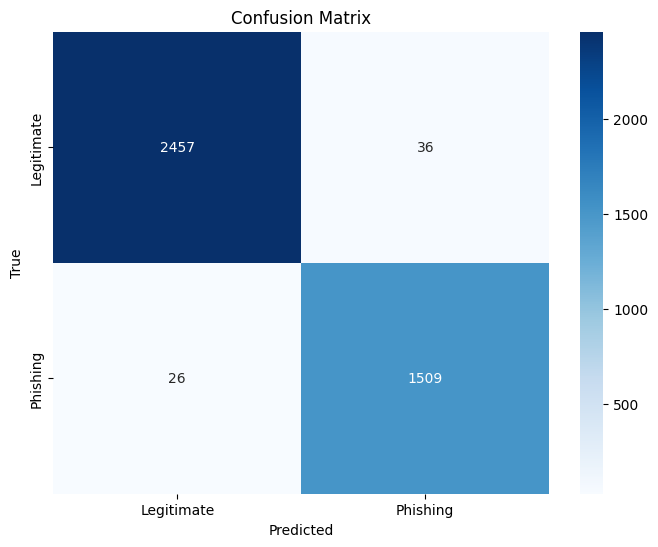

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(texts_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(texts_test, truncation=True, padding=True, max_length=128)

# Prepare data for BERT
import torch
class PhishingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx]),
        }

train_dataset = PhishingDataset(train_encodings, labels_train)
test_dataset = PhishingDataset(test_encodings, labels_test)

# Load pre-trained model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    save_steps=500,
    save_total_limit=2,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("\nEvaluation Metrics:")
for key, value in eval_results.items():
    print(f"{key}: {value:.4f}")

# Test the model
test_results = trainer.predict(test_dataset)
predictions = test_results.predictions.argmax(axis=1)
true_labels = test_results.label_ids

# Display test metrics
print("\nTest Metrics:")
for key, value in test_results.metrics.items():
    print(f"{key}: {value:.4f}")

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()